<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vader" data-toc-modified-id="Vader-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vader</a></span></li></ul></div>

# Libraries

In [4]:
import pandas as pd

In [ ]:
import functions

# Data

In [5]:
data = pd.read_csv('/Users/antoniooliveira/Downloads/airlines_reviews.csv')

In [7]:
data.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Seat Comfort,8100.0,3.414815,1.397183,1.0,2.0,4.0,5.0,5.0
Staff Service,8100.0,3.569877,1.527436,1.0,2.0,4.0,5.0,5.0
Food & Beverages,8100.0,3.384074,1.455694,1.0,2.0,4.0,5.0,5.0
Inflight Entertainment,8100.0,3.636790,1.309564,0.0,3.0,4.0,5.0,5.0
Value For Money,8100.0,3.148642,1.589377,1.0,1.0,3.0,5.0,5.0
Overall Rating,8100.0,5.632469,3.523664,1.0,2.0,6.0,9.0,10.0


# Exploratory Data Analysis

Unique Values

In [23]:
for column in data.columns:
    print(data[column].value_counts(), '\n')


Title
Turkish Airlines customer review    11
Qatar Airways customer review       11
worst customer service               9
a pleasant experience                9
seats were comfortable               8
                                    ..
very comfortable experience          1
not impressed by the performance     1
ANA is simply the best               1
bad communication                    1
genuinely friendly staff             1
Name: count, Length: 7614, dtype: int64 

Name
Michael Schade        44
Anders Pedersen       40
Michel Perrin         29
Alwaleed Althani      27
Elaine Loh            23
                      ..
G Deene                1
G Hayes                1
Jacob Chundamannil     1
Ann Sebastian          1
D Lanor                1
Name: count, Length: 6583, dtype: int64 

Review Date
2017-12-18    12
2018-10-17    11
2019-10-16    11
2018-09-18    11
2019-09-22    11
              ..
2019-09-10     1
2018-12-26     1
2018-04-17     1
2017-06-23     1
2024-03-01     1
Na

Missing Values

In [26]:
data.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

Checking for Incoherencies

In [28]:
data.sort_values(by='Review Date', ascending=False)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
2596,business seating is very comfortable,Susan James,2024-03-06,All Nippon Airways,False,"ANA has great service, very clean restrooms ...",Couple Leisure,March 2024,Ho Chi Minh City to Tokyo,Business Class,4,5,4,4,5,10,yes
4405,don't waste money on Business,S Dunlop,2024-03-04,Turkish Airlines,True,Do not waste money on a Business Class fligh...,Business,February 2024,Manchester to Kathmandu via Istanbul,Business Class,3,3,3,3,1,3,no
2854,certainly not a premium airline,E Galetski,2024-03-04,Emirates,True,Our BKK-DXB flight was delayed for 18 hours ...,Family Leisure,February 2024,Bangkok to Warsaw via Dubai,Economy Class,3,1,3,4,1,1,no
2855,Qatar Airways really puts them to shame,E Bayaz,2024-03-04,Emirates,True,Definitely not the standard I would expect f...,Solo Leisure,March 2024,London Stansted to Lahore via Dubai,Business Class,4,3,1,1,2,3,no
4406,cabin crew they seemed indifferent,S Dunlop,2024-03-04,Turkish Airlines,True,"The plane was antiquated, my footrest box un...",Business,January 2024,Bogota to Istanbul,Business Class,4,1,1,1,2,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,a beautiful looking plane,Fiona Teo,2016-03-24,Singapore Airlines,False,Flew economy on Singapore to Kuala Lumpur re...,Business,March 2016,MNL to SIN,Economy Class,2,5,5,4,2,8,yes
969,crew were very relaxed,S Gooneratne,2016-03-23,Singapore Airlines,False,"Dhaka to Melbourne via Singapore, flights op...",Business,March 2016,MEL to DEL via SIN,Economy Class,5,5,3,4,4,9,yes
6089,probably never fly them again,Mona Farrugia,2016-03-23,Turkish Airlines,False,Malta to Kilimanjaro via Dar es Salaam. We a...,Couple Leisure,March 2016,IAH to KHI,Business Class,4,5,3,5,2,2,no
970,Food and IFE average,S Gooneratne,2016-03-22,Singapore Airlines,True,Melbourne to Delhi via Singapore. Check in f...,Business,March 2016,SIN to CAN,Economy Class,3,5,4,4,4,6,yes


# Preprocessing for Lexicon-based

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniooliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
data['Reviews_1'] = data['Reviews'].apply(lambda text: preprocessor(text,
                 lowercase=True, 
                 leave_punctuation = True, 
                 remove_stopwords = True,
                 stop_words = stop_words,
                 correct_spelling = False, 
                 lemmatization=False, 
                 porter_stemming=False,
                 tokenized_output=False, 
                 sentence_output=False))

In [48]:
data['Reviews_1'].sample()

3544    delhi london via dubai. seating alright. ends ...
Name: Reviews_1, dtype: object

## Vader

In [53]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [54]:
def vader_sa(song, compound = True):

    # Get the polarity scores (negative, neutral and positive) for the song
    polarity_scores_ = vader.polarity_scores(song)
    
    # If you want to compound the scores into one final score
    if compound:
        polarity = polarity_scores_["compound"]

    # If you want the three scores
    else:
        # The three separated scores
        polarity = polarity_scores_

    return polarity

In [55]:
data["vader_polarity_compound"] = data["Reviews_1"].apply(lambda song : vader_sa(str(song)))

data["vader_polarity_scores"] = data["Reviews_1"].apply(lambda song : vader_sa(str(song), compound = False))

In [57]:
data.sample(5)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,Reviews_1,vader_polarity_compound,vader_polarity_scores
7959,lost my wallet before boarding,L Gan,2019-12-12,Korean Air,True,Seoul to Hong Kong. I lost my wallet right b...,Solo Leisure,December 2019,Seoul to Hong Kong,Economy Class,3,5,4,4,3,5,no,seoul hong kong. lost wallet right boarding ou...,0.5106,"{'neg': 0.077, 'neu': 0.807, 'pos': 0.116, 'co..."
7916,Really great experience,S Mayle,2023-12-03,Korean Air,True,"Really great experience. Really good food, ...",Solo Leisure,December 2023,Auckland to Seoul,Economy Class,5,5,4,3,5,9,yes,"really great experience. really good food, leg...",0.9632,"{'neg': 0.0, 'neu': 0.443, 'pos': 0.557, 'comp..."
4594,best service I have received,John Webber,2023-06-24,Turkish Airlines,True,Just flown Turkish Airlines for the first ti...,Couple Leisure,June 2023,Antalya to Istanbul,Business Class,5,4,2,3,5,10,yes,flown turkish airlines first time business cla...,0.7430,"{'neg': 0.0, 'neu': 0.9, 'pos': 0.1, 'compound..."
7273,Check in was very efficient,R Gannell,2018-06-19,Cathay Pacific Airways,True,London to Hong Kong. Check in was very effic...,Couple Leisure,May 2018,London to Hong Kong,Economy Class,4,5,5,4,5,10,yes,"london hong kong. check efficient heathrow, st...",0.9968,"{'neg': 0.008, 'neu': 0.704, 'pos': 0.289, 'co..."
6420,All four flights were good,S Tegtmeier,2019-12-28,Air France,True,Munich to Lyon and Lyon to Frankfurt via Par...,Solo Leisure,October 2019,Paris to Nairobi,Economy Class,1,2,2,4,4,8,yes,munich lyon lyon frankfurt via paris cdg. book...,0.9728,"{'neg': 0.051, 'neu': 0.655, 'pos': 0.294, 'co..."


In [59]:
data.groupby('Overall Rating')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
Overall Rating,,,,,,,,
1,1808.0,-0.298590,0.649687,-0.9915,-0.855075,-0.58820,0.252125,0.9954
2,692.0,-0.144514,0.686844,-0.9901,-0.790300,-0.35280,0.584250,0.9932
3,522.0,0.029044,0.714229,-0.9887,-0.707650,0.02580,0.771700,0.9936
4,381.0,0.124858,0.688605,-0.9890,-0.597500,0.24840,0.800200,0.9943
5,436.0,0.308215,0.652665,-0.9771,-0.296000,0.55290,0.898450,0.9954
6,346.0,0.514557,0.552027,-0.9729,0.195700,0.77800,0.930075,0.9937
7,509.0,0.733962,0.417034,-0.9643,0.735100,0.91690,0.964700,0.9966
8,742.0,0.845166,0.279529,-0.8852,0.862500,0.94675,0.975575,0.9978
9,1054.0,0.869843,0.262884,-0.9308,0.895700,0.95415,0.977600,0.9983


In [66]:
# Histogram
def histogram(data):
    plt.hist(data, bins=22, color='#FF914D', ec='#F16007', alpha=0.7, label='Data Points')  # Adjust the number of bins
    plt.title('Histogram')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    # Set x-axis limits to include a larger range
    plt.xlim(min(data), max(data)) 

    plt.show()

--------------------------------------------------------------------------------
                               Overall Rating: 1


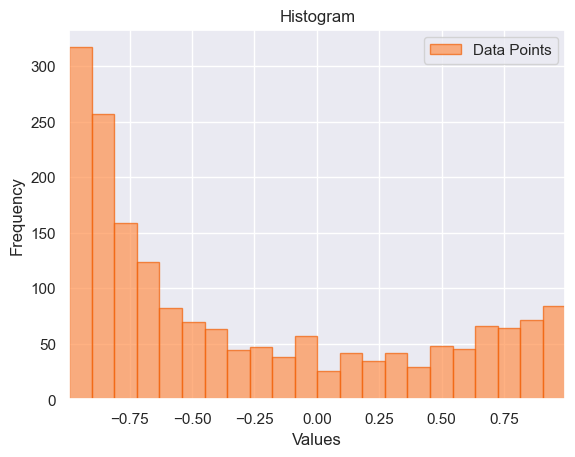


--------------------------------------------------------------------------------
                               Overall Rating: 2


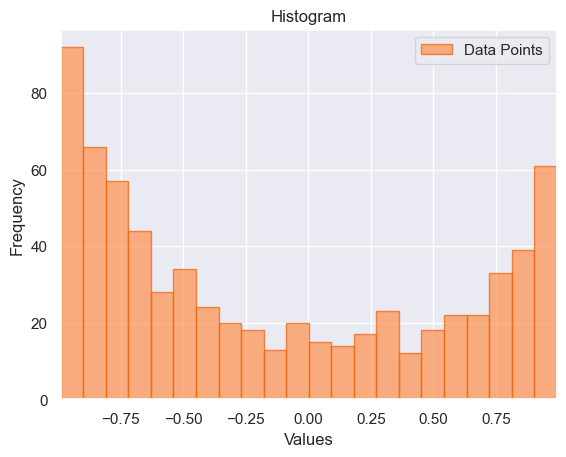


--------------------------------------------------------------------------------
                               Overall Rating: 3


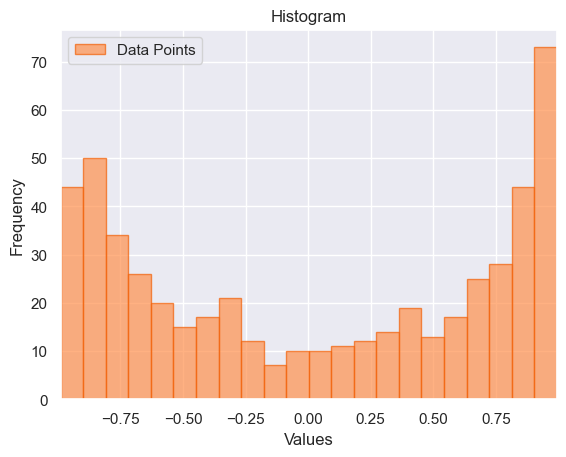


--------------------------------------------------------------------------------
                               Overall Rating: 4


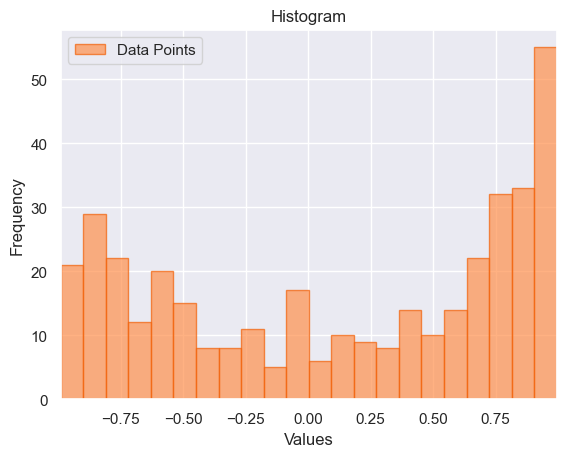


--------------------------------------------------------------------------------
                               Overall Rating: 5


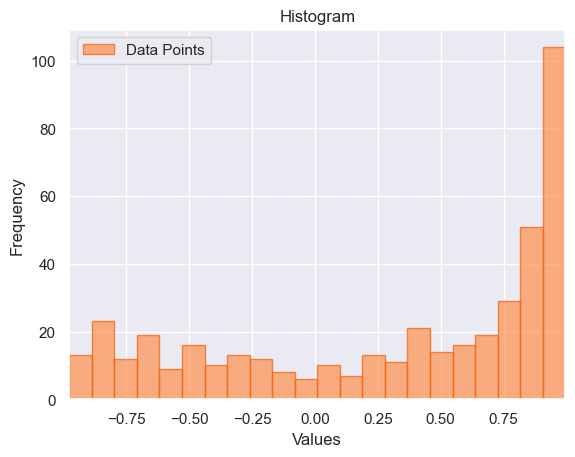


--------------------------------------------------------------------------------
                               Overall Rating: 6


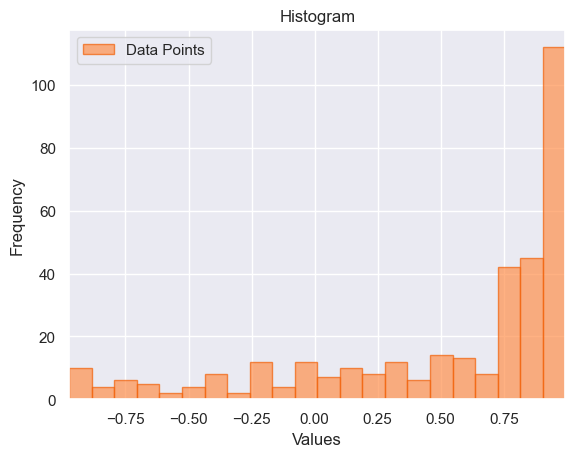


--------------------------------------------------------------------------------
                               Overall Rating: 7


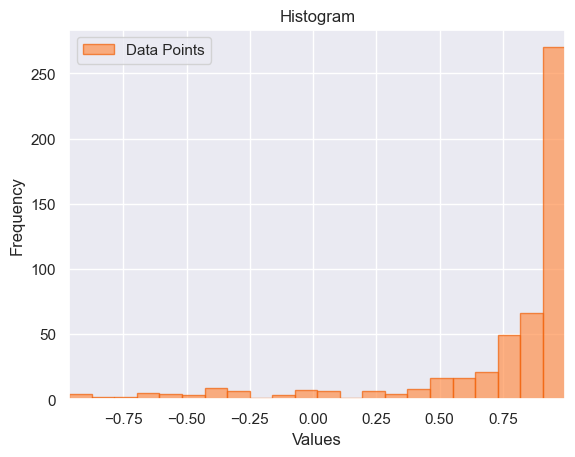


--------------------------------------------------------------------------------
                               Overall Rating: 8


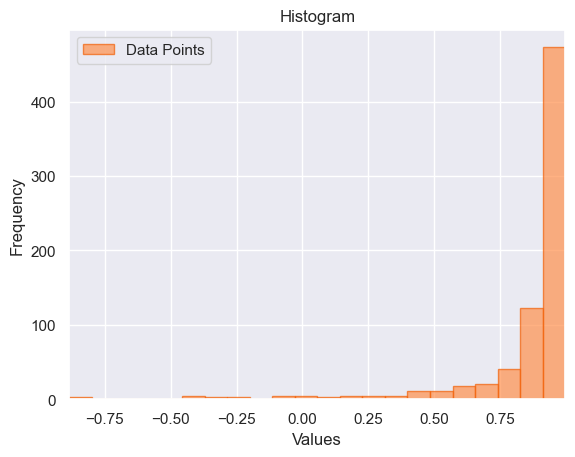


--------------------------------------------------------------------------------
                               Overall Rating: 9


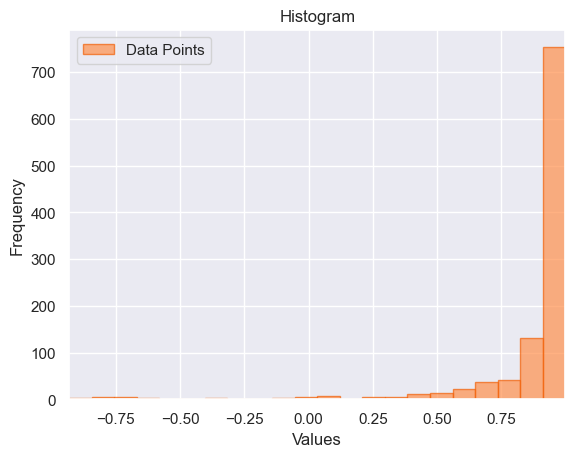


--------------------------------------------------------------------------------
                               Overall Rating: 10


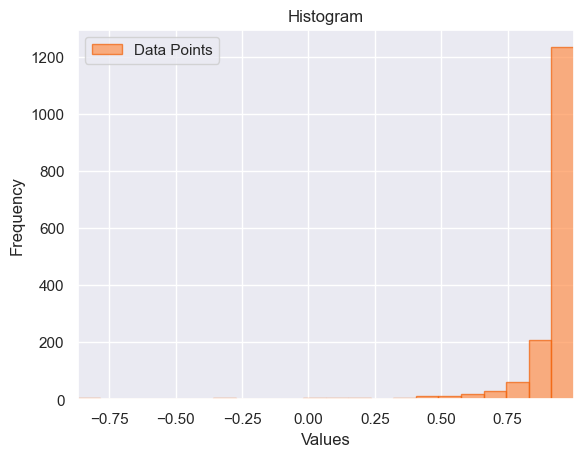

In [77]:
# Get unique values of 'Overall Rating' column and sort them in ascending order
unique_tags = sorted(data['Overall Rating'].unique())

# Loop through sorted unique tags
for tag in unique_tags:
    print('--' * 40)
    print(' ' * 30, f'Overall Rating: {tag}')
    histogram(data[data['Overall Rating'] == tag]['vader_polarity_compound'])
    print('')
